# Screen identification

In [2]:
#### Localize the LCD on the thermostat 

# import the necessary packages
from imutils.perspective import four_point_transform
import matplotlib.pyplot as plt
from imutils import contours
from PIL import Image

import numpy as np
import imutils
import cv2
import os

# define the dictionary of digit segments so we can identify
# each digit on the thermostat
DIGITS_LOOKUP = {(1, 1, 1, 0, 1, 1, 1): 0,
                 (0, 0, 1, 0, 0, 1, 0): 1,
                 (1, 0, 1, 1, 1, 1, 0): 2,
                 (1, 0, 1, 1, 0, 1, 1): 3,
                 (0, 1, 1, 1, 0, 1, 0): 4,
                 (1, 1, 0, 1, 0, 1, 1): 5,
                 (1, 1, 0, 1, 1, 1, 1): 6,
                 (1, 0, 1, 0, 0, 1, 0): 7,
                 (1, 1, 1, 1, 1, 1, 1): 8,
                 (1, 1, 1, 1, 0, 1, 1): 9
                }
folder = os.getcwd()
image_list = []
for file in os.listdir(folder):
    image_list.append(file)
image_list = ['data//HQ_digital//f459be06cce486e8199930cfb3ed8c42d2f1a4b8.jpg','data//HQ_digital//f655c28f9f983c49d10d0744b6df17b60aef59e9.jpg','data//HQ_digital//f2874f433bb06748b4a583ef35b827ae352ef147.jpg','data//HQ_digital//f8078b64f04fff2627fa142eb26084a166870bd4.jpg','data//HQ_digital//f467271c3de398ffe78268830059c2fd8dc29b90.jpg','data//HQ_digital//f306218639ef34f32df3d50073efd7521f7b3ac1.jpg','data//HQ_digital//fa61c55f5f6118108d5a210875c79e2335bea219.jpg','data//HQ_digital//fbb22d2e929fc4e7cef446edf6306fd807329bea.jpg','data//HQ_digital//fbd02b4f1eac089a9af1a9e0a24e888e3226d6bc.jpg','data//HQ_digital//fc7e8efc0039ff4f010ef9b28783351575e225bd.jpg','data//HQ_digital//fc302f8fddf7e0a77550953f36d6a5148019680e.jpg','data//HQ_digital//fdddffcd1423ea0366eb81802ce1351bccf6dcaa.jpg','data//HQ_digital//fe1dc0a44b58c36fd9215a6d201920deefe7c309.jpg','data//HQ_digital//ffd083a696ac010ca5a9a3cbecdb28a57a167732.jpg','data//HQ_digital//05e5e706f7654e756c1d4dc0740759f9559ab638.jpg','data//HQ_digital//05f3d4b586d92ba18b00dedd6dbe4a163f9ea1c1.jpg','data//HQ_digital//5addbeb17642fd1bedfa36f02aa594601d9a4d7e.jpg','data//HQ_digital//5d86e39532e6eac079395d645962a455678aced9.jpg','data//HQ_digital//5efa991cf18e861feaedf77355a6de1a010cb79b.jpg','data//HQ_digital//6b5d829c02194467ae05ab5c9cc563671814c159.jpg','data//HQ_digital//6be6106d6ca690c46cd575d85294185c86081006.jpg','data//HQ_digital//6d9e01bb68c31e9227beb6b0fd52423f21c16648.jpg','data//HQ_digital//6e698f0b367607f0fa89763a2f1c3e11c42096ad.jpg','data//HQ_digital//7b46efce5cb470220e16da197406c8b21ea2c840.jpg','data//HQ_digital//7c78f916fc9f716f6c7db5095cd690f79b29cd31.jpg','data//HQ_digital//7d5791314bdebcf4d57b8c7f0358abe7cc1003e8.jpg','data//HQ_digital//7df49abdbd72e550b6f37ebb5206ab4e94f4be7d.jpg','data//HQ_digital//7f6c0991090642ce15ee5b79019157f104dcf99d.jpg','data//HQ_digital//08d0cfda33f8ba7f58945e600ae44daa93ed0cda.jpg','data//HQ_digital//8e4f016190f77e5aa58c53509d869e915a0be67b.jpg','data//HQ_digital//8ecb0b9d2fba086caf434b7a4864434f9ea0da0e.jpg','data//HQ_digital//8edb3482301d1a01e52312c33e055b55d2fa9134.jpg','data//HQ_digital//8eeaee0a4748acb92d5fbbccd10c93d120b96986.jpg','data//HQ_digital//9a0c8185141db0f185bed03de473f55c7ef3ba35.jpg','data//HQ_digital//9a36b9a6305e01cb859fce9eb01b9bbfbc4cbbbd.jpg','data//HQ_digital//9b5cac08bb596e68e52fd5f5033f74e00622cfa5.jpg','data//HQ_digital//9b335a61b30d6097ba1417dc56b2f271b86b4be4.jpg','data//HQ_digital//9b53257ee7e2e46b0e2907c5b8aaac4b94712faa.jpg','data//HQ_digital//9e111802446b62b86aeffe911415ad28227caba7.jpg','data//HQ_digital//9f4e2949e665100744dafaaa13c9d436bdd7fff9.jpg','data//HQ_digital//9f7011199d11492f06dd62fc02845952175a8741.jpg','data//HQ_digital//9fbf5baf2483b1c0cb21c8d00cbe6dac038b2ff1.jpg','data//HQ_digital//10edfb73d2b261b00e2f509ec36b05c4d6fab706.jpg','data//HQ_digital//12e7597c51eacba5455793920b73d008db8a63b4.jpg','data//HQ_digital//12eaf64c705f59843fee2458d0f442246077beac.jpg','data//HQ_digital//15c41a2e99339f2698e386e1370ac1471ae430e3.jpg','data//HQ_digital//15ec2ecb8287e6b0e98d20ae5933c0e41012aff0.jpg','data//HQ_digital//18a1f78397b98a02bcbfbe69b390b9c72be1d686.jpg','data//HQ_digital//18f0202e901fb1ed202bc75d68533358e3c8b7e3.jpg','data//HQ_digital//21e25ab0ed146f090ce70a747ce621c60ef263ef.jpg','data//HQ_digital//24bac054e26aff252bc4dc768a43a8d20a82c380.jpg','data//HQ_digital//26f0a94f2cb7b8637e3f5339799d5f4ba1029024.jpg','data//HQ_digital//27f3c33acc8c524f97d752e7577e1c379727855a.jpg','data//HQ_digital//28feeee4d7e52d0ba5d2cee31c8886e57f574319.jpg','data//HQ_digital//29d04b7a38c2d2005f07588f348296f396fe8614.jpg','data//HQ_digital//32de75ac61ffc12b0a3c9a1e797682735c94f0b3.jpg','data//HQ_digital//34bd9ee3b020d9cd5297d6990784719bc68f2f2e.jpg','data//HQ_digital//36a73c74ef0b76639e12488651f587fb06a9baab.jpg','data//HQ_digital//36c8f6a2971fa968f0eb9c75c27136ef2b1bf73f.jpg','data//HQ_digital//39dbdff5337ff8bf555923bf6b4e7918ddf698af.jpg','data//HQ_digital//41b5d9fc07d41287a37339282057a1aff4c7b2ed.jpg','data//HQ_digital//41ba9d95ab7ef9a43bfccfa13f9ffc160f25b8ab.jpg','data//HQ_digital//45d7f253212cb2fbb401aa6193d8b8e4e4420854.jpg','data//HQ_digital//45fec9e34de2083d6e045b7ee99b0780183ab0e9.jpg','data//HQ_digital//46fa7d1747356d68ecae9b59cd6ae8086fd6123f.jpg','data//HQ_digital//48a1a65aa0c10594219c98d6a36ae695e1b0aea5.jpg','data//HQ_digital//49ec32bdf9f7a1f5ddecc606f3cb42a4ae6c44fd.jpg','data//HQ_digital//51bf596a3c477f7944dd6d1fa83da310da375dc0.jpg','data//HQ_digital//57f163278000a53c4199e6cff9e949bef60154f7.jpg','data//HQ_digital//58b18aba0f01c20bc6042525158579785c74eba0.jpg','data//HQ_digital//58dfbdaeab5fda2ceb0e7bafdb240becfafb762a.jpg','data//HQ_digital//60a6920c0470dee667dd218bab542e0528e3ba8f.jpg','data//HQ_digital//60f603ee8cc95cf1125c4f159502f65b85195bef.jpg','data//HQ_digital//62e96bf40409b3b6fd74065ab0bf3ec44f9d0a61.jpg','data//HQ_digital//63a8e6111690bca37052c237047fd85162facf5d.jpg','data//HQ_digital//64c2c2499251eb9ba07f3476d6205a0156773ffc.jpg','data//HQ_digital//67fcfc525568301048c4eeb4554173013daed55a.jpg','data//HQ_digital//73a572dd4369bdb99f5669cb038019160bc63b47.jpg','data//HQ_digital//73bdc1e381510f46aac391bddd99d2dee1f39e8d.jpg','data//HQ_digital//74e0e46b6111bafccb1d01cb684dab0d604a9142.jpg','data//HQ_digital//77aaf9400e8e44b728951ab5604e2eaa6a864dd1.jpg','data//HQ_digital//80f4419eee02f02c34f4b4f65d65b34ad07be278.jpg','data//HQ_digital//81ac47bdd1e225569ed626a723644a00216d8f75.jpg','data//HQ_digital//0086c28630535f9d722eed740f9ce3f8336ec432.jpg','data//HQ_digital//86aefd62c2e164037a5fdfa2feda74801a5da14c.jpg','data//HQ_digital//86f374d068c3526c462b47a55dc2f7cbffe34521.jpg','data//HQ_digital//87e827d58b36c7921568b270eae938e677c97207.jpg','data//HQ_digital//94d7dd836ea0c1b8f4fdf7dac0779e009bd2de7c.jpg','data//HQ_digital//97fbf9288a53ee809eb4538b507b1b8c01b17be5.jpg','data//HQ_digital//98ec95acaf26bde374a5301009c0fe7c09e447ac.jpg','data//HQ_digital//129bb38115a3cf224bdf9a593e2df0465db79bc6.jpg','data//HQ_digital//169ee15bb3b1036bee1012ec12c91048939b1589.jpg','data//HQ_digital//184bad9043c572a63c3e2f838e79955faf946181.jpg','data//HQ_digital//191fdfd5dbe6f3c98f8c177128349077b1e4c876.jpg','data//HQ_digital//0249b3ed6a5442489f764e48177e28422e48296a.jpg','data//HQ_digital//494c6fda6eace52cecf37de39c5921517739ab58.jpg','data//HQ_digital//503c6f058305af8803290cfd7b101f61060ede87.jpg','data//HQ_digital//530cd0787c68b42d9a0c2d054b28bdddc37b1175.jpg','data//HQ_digital//0688de8a02d78ef6fc31ee7aa625eb1a7dc3ba4a.jpg','data//HQ_digital//768ffa2daba12461bc698a2b740ecbbfb15fce8c.jpg','data//HQ_digital//947ed0d788292140ef2a23326969d962d423575e.jpg','data//HQ_digital//957d8fe28fed4ca5f8b2aab0a4ff3032ca631165.jpg','data//HQ_digital//1755d81d0bbd4be27d0389b6edf416ff50621d4f.jpg','data//HQ_digital//2498d375b9d31b142841b57a4ac3983e7a698075.jpg','data//HQ_digital//3143a8b25a7f6f9ac1b47475d010ea6d113270b8.jpg','data//HQ_digital//3783acb95a917cf46cd7dc0fdcf9466cc98707bb.jpg','data//HQ_digital//4534e267bea350e8afdfff3e9c4d0933933b0429.jpg','data//HQ_digital//4556bd987b4448bf6a45adf2fb9b40d495d1f00d.jpg','data//HQ_digital//5108b091a7f6a6364f7f125cead992f55fafb8ed.jpg','data//HQ_digital//5232b54dc19f64026dde07b3d3f3b7b868162352.jpg','data//HQ_digital//7910fdcf50e2e8a471e13056eec64befa8a94140.jpg','data//HQ_digital//9254cdb3e6d79badf7aeed6973383edaaaaa7e64.jpg','data//HQ_digital//9879e8fcac36d3a82bea304b0af56bde5533f5f1.jpg','data//HQ_digital//16059ed087ceb8a0d664934a78c414349bf9ac93.jpg','data//HQ_digital//28664c8bffb7bec48411563f3c0db7e5f118889b.jpg','data//HQ_digital//30131c888cef3e66e4cb4f29ee45c43c8b24aeaa.jpg','data//HQ_digital//48990b5cbe173868040bd33f06fb1b80c2b4f28a.jpg','data//HQ_digital//55879a955e5b20ea30ead7c5b3557287b335c632.jpg','data//HQ_digital//64497aa7f4d0ec03260d50917487bf7e0dad8631.jpg','data//HQ_digital//85734ff0041e6244f29ffcfbe2c89d8c580162dc.jpg','data//HQ_digital//260693f35709a7fe26304978d77ab9ccc45fa5ad.jpg','data//HQ_digital//474494db28922d7e400d7b24541695bcb6366532.jpg','data//HQ_digital//631887ed74c7390a6e2c81d5c11ac529b40cac24.jpg','data//HQ_digital//647517ae17cb333fe4187bdaec6db1e919c52896.jpg','data//HQ_digital//659667ef81a9faea100e326ae165535e530785d4.jpg','data//HQ_digital//840502a0ad0ee55ef41b7a051cc86d9471559cb1.jpg','data//HQ_digital//852980ab54fe5cf1039940b0e6ac33a47172a12f.jpg','data//HQ_digital//1046212bf9fd73fcd343e2f80886e92ebe4f7673.jpg','data//HQ_digital//4155206a4bc1633ddfb2f0fd907dfd01d2e1616e.jpg','data//HQ_digital//4406201aab58cec6990ce4738eec3f353ada3c0f.jpg','data//HQ_digital//12662593fe501b98e441b948ad553a46cc1944cd.jpg','data//HQ_digital//92230131b7174318da8b76b80884ebf17f9ea6f6.jpg','data//HQ_digital//165679858cfc4cd754e71a14d0381bc94a521cba.jpg','data//HQ_digital//500754878cb758552f525280c872dc565b3de8b5.jpg','data//HQ_digital//846136278e66e5431f21403ca750168fd825930a.jpg','data//HQ_digital//81200578963bee698c6c450dfb448255f0b991af.jpg','data//HQ_digital//373864709100c8c0b8f3e6c3722ff9453747b889.jpg','data//HQ_digital//565655306167c014f879797a2ee651ad590f1157.jpg','data//HQ_digital//2236648840225d976d1feb6155c9de07b129f403.jpg','data//HQ_digital//a0fcee07eb3fbe5145ec497d42a918fbc615fd4e.jpg','data//HQ_digital//a6bd371130fec0f12d7b2a32865ddae3e026aa37.jpg','data//HQ_digital//a92e0e57271054308e87d3fd64530bd812c43978.jpg','data//HQ_digital//a3169ca6db33dda2b32c96f5063117e2ee3eb2c0.jpg','data//HQ_digital//a7587241454eeec7fa380250102423a7ff64c22b.jpg','data//HQ_digital//aaa54960feb69aa9be5bb088ad9dbf0a6d4cee2d.jpg','data//HQ_digital//ac74fcbbaced723cd4ba98fd7fab764a665783ec.jpg','data//HQ_digital//ad09efeb3fb287283c6674797b9214313d12b5f1.jpg','data//HQ_digital//ad303bb8b900d6002a618c9edb2691e4927986d8.jpg','data//HQ_digital//ae7c13f09ce55a6ebb4eab0819b5340f960e89f1.jpg','data//HQ_digital//aee88596159ace71523271065199866d5ed89dad.jpg','data//HQ_digital//afc914e1bdf29f16b78de8afd3dd3739a55dc914.jpg','data//HQ_digital//b2b721636f4ba3ef7cd4f2e2eec3730116470f58.jpg','data//HQ_digital//b3a9e5dcdca2c89d0e0ccc9aab1d74f74ddb9cd6.jpg','data//HQ_digital//b5d5e0eff5f4408e101561c89f0172212a6d2216.jpg','data//HQ_digital//b7f78a8f28674b7700c7c8f0c1e949cd6eab5f42.jpg','data//HQ_digital//b77a9c3bdaf91f0fcce9ca05f598c34139a11205.jpg','data//HQ_digital//b772d011f189cc97e88de5d114a0821941435fd4.jpg','data//HQ_digital//b802e264b4be4f3ea85671ef53da4d39097a2937.jpg','data//HQ_digital//b0960a1248959ec24e6a7241e8c6c6d343c1141d.jpg','data//HQ_digital//b4277e42d2cce05adde28e436ecc141c4733ab45.jpg','data//HQ_digital//b746312f413f1373779b00b82d9c83c0e3d881b2.jpg','data//HQ_digital//b709749645b5c905d731a7f3725433b7c0360526.jpg','data//HQ_digital//b1195235570b5ee9f11ba8adb64e165b8d81e6d0.jpg','data//HQ_digital//b9459761282e4785af2ece0ad86a9fcd05047bfd.jpg','data//HQ_digital//bd2e1293ba838ca0fb9baf0d4a8aaa7cfda007dd.jpg','data//HQ_digital//bdbf41a1d93043386f690c2ab077b1bff5bc023f.jpg','data//HQ_digital//beb7c3ddd59f77b342ab1d4016d11562f8543de6.jpg','data//HQ_digital//bf52fb9d9ca985341979a2b9db06838614f306b5.jpg','data//HQ_digital//bf81cd3258241d91ba9e915e8bf309da16a574ed.jpg','data//HQ_digital//bf587a4df84cc4dd291e9c64b1c0e5a0d198580c.jpg','data//HQ_digital//c1db6c89fb26a051f71726f7df032e43de6046bc.jpg','data//HQ_digital//c2d2ca4a41d723ee42c407d1fdc86a542b597dc0.jpg','data//HQ_digital//c5afb8d3970a23a361c3f8a1e54400d5b0d07c89.jpg','data//HQ_digital//c6b10b24c45ce1cbe505f6130b14c503810ee3d6.jpg','data//HQ_digital//c18b6f8b996ee88e387824a41e123e9e3e56d348.jpg','data//HQ_digital//c56c79a6eb6df9942c4922b5112e7855d79b4867.jpg','data//HQ_digital//c203beb685cec15caa6a25122daed0b28df3b951.jpg','data//HQ_digital//c0313de737369b43bb8d6855517e4980630c89bd.jpg','data//HQ_digital//c836ea17748e562c99f93edc51f2b900664ec37d.jpg','data//HQ_digital//c1119af716de4f4954efb087092a49ee3b48be13.jpg','data//HQ_digital//c6050c9162ec2310f81dea88715d9f0af4f98942.jpg','data//HQ_digital//c61272eefb1800353952a64d8232b2fdf3a26e52.jpg','data//HQ_digital//c69919d412947c420a8150017bcb05cda8ab7fb7.jpg','data//HQ_digital//caed5ebb6fc271d447c2f286dab64583e64c3324.jpg','data//HQ_digital//caf2e1f69e943deb7a05a4b1f08de37651b9498b.jpg','data//HQ_digital//cc3f2c7a152b1353e4d0149ea4516bed71c781df.jpg','data//HQ_digital//cc4bf7bc265a045746f6a2ac3c77c6a498712307.jpg','data//HQ_digital//cc9acb43543022d0e9ba0af8e059f92a602ba80f.jpg','data//HQ_digital//cd4d249fd27369f927124e67151b8d97e4bdfdd4.jpg','data//HQ_digital//cf9e98f7f7793bc13d41d24a7fce6ef600a57fa4.jpg','data//HQ_digital//d4b26d2b599dbad8acd3db7ce0f7242758b05907.jpg','data//HQ_digital//d4d80b48e9a9cc80bdcfa4cdadf29951a18df346.jpg','data//HQ_digital//d4e4850433c86506a1e0712a3fcf639dba393c79.jpg','data//HQ_digital//d0183d179d58dd8157283feb50a7b2bd53b24005.jpg','data//HQ_digital//d350bed5855bb0233e9f539da24ab4d9fd25eadf.jpg','data//HQ_digital//d795e6592de9c1c5187a86769b8c5d7444cbaefd.jpg','data//HQ_digital//dd6b9a76ce131643252f4738bf1ec759809fc4b5.jpg','data//HQ_digital//dd31a247c313689d77bbf8fbf2bd7dbac8d44333.jpg','data//HQ_digital//dea0071da808c456b52e9ae7c681ce12d522ec38.jpg','data//HQ_digital//e1aede3b8be7b86dbacf12494d7fb737f614e1df.jpg','data//HQ_digital//e1d0c7cffa534df014e9a2970b1b29171f8a8a90.jpg','data//HQ_digital//e6bf1df203b043c813d09f9db881595406920725.jpg','data//HQ_digital//e8cf4d4a50b7b5502cad2d1d36655f3734551428.jpg','data//HQ_digital//e47f55e29fb263bcdda378a8fc9fcc14cb532653.jpg','data//HQ_digital//e72a9402841f1fd6a2c3c9f27a25d405640ce194.jpg','data//HQ_digital//e091c458e962655ceff9bff8ff56961d8ce23b99.jpg','data//HQ_digital//e834fadd3461bb593a7d2d72885f8d2319480b87.jpg','data//HQ_digital//e023858ed388731bbccbbc2d6a64983b145b0b4a.jpg','data//HQ_digital//e104664ba1792dde641d87cd5d95f1df06786140.jpg','data//HQ_digital//e452881a7b82c7b224e38b754424da1f3b96060d.jpg','data//HQ_digital//ea505d33dc581c054d6ab218048536b9e5b05fe4.jpg','data//HQ_digital//ebbeb1b4a007e7d5a4f62c2b504484c09fb43dde.jpg','data//HQ_digital//ed19955cfa901c23e20ba492411e34906586436e.jpg','data//HQ_digital//f1cbc378299894f7f09e6d3aea25b0f962e9af8a.jpg','data//HQ_digital//f4c377be5defcba29c7f722b718a7319988e6add.jpg','data//HQ_digital//f9b1f447c64e60597eef190ab328460c77a17bd0.jpg','data//HQ_digital//f27af009385bf56b693dd96ca50bfdc93b8a945a.jpg','data//HQ_digital//f78fe5a461f28bc770a7dd856878bb4a314a9027.jpg']

# 2. Test centering on results

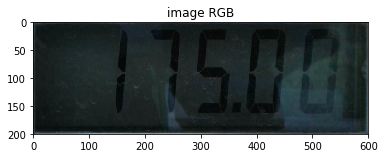

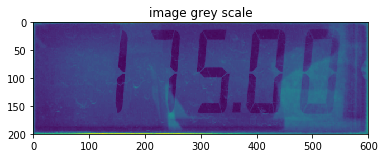

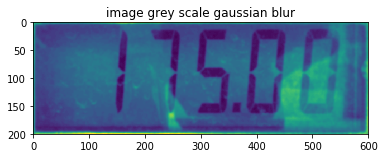

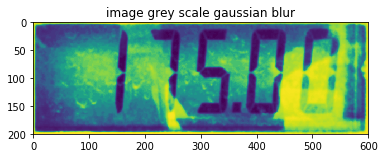

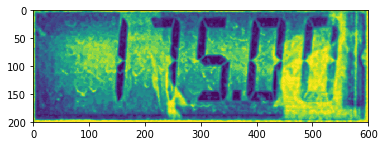

point sombre:0.0
point claire:206.0
median: 135.0
mean: 130.42735


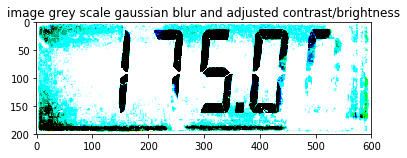

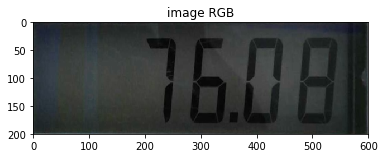

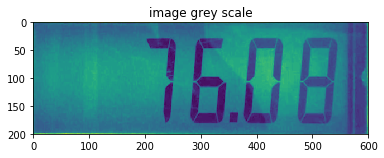

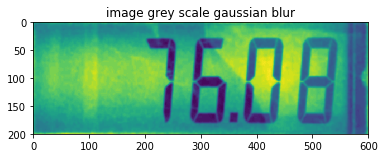

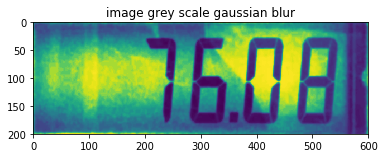

In [ ]:
for file in image_list:
    # load the example image
    image = cv2.imread(file)
    # pre-process the image by resizing it, converting it to
    # graycale, blurring it, and computing an edge map
    width = 600
    height = 200
    dim = (width, height)
    image =  cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    plt.imshow(image)
    plt.title('image RGB')
    plt.show()
    plt.imshow(grey)
    plt.title('image grey scale')
    plt.show()
    
    # Eliminate the noise using a gaussian blur
    image_gaussian = cv2.GaussianBlur(image, (7,7), 0)
    image_gaussian_grey = cv2.GaussianBlur(grey, (7,7), 0)
    plt.imshow(image_gaussian_grey)
    plt.title('image grey scale gaussian blur')
    plt.show()
    
    # Eliminate the blurr using a hist equalisation
    image_gaussian_grey = cv2.equalizeHist(image_gaussian_grey)
    plt.imshow(image_gaussian_grey)
    plt.title('image grey scale gaussian blur')
    plt.show()

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(75,75))
    cl1 = clahe.apply(image_gaussian_grey)
    plt.imshow(cl1)
    plt.show()
    
    # Adjust contrast and brightness settings
    ptsb, ptcl, loc1, loc2  = cv2.minMaxLoc(image_gaussian_grey)  
    ptcl = np.quantile(image_gaussian_grey, 0.8)
    image_gaussian_grey = image_gaussian_grey - ptsb
    median = np.quantile(image_gaussian_grey, 0.5)
    mean = np.mean(image_gaussian_grey)
    print("point sombre:" + str(ptsb)) 
    print("point claire:" + str(ptcl)) 
    print("median: " + str(median))
    print("mean: " + str(mean))
    coef_dilatation_mul = 10000/(ptcl - ptsb)
    coef_dilatation_add = - 5*ptcl
    output_bright_RGB = cv2.addWeighted(image,coef_dilatation_mul, image, 0, coef_dilatation_add)
    output_bright_grey = cv2.addWeighted(image_gaussian_grey, coef_dilatation_mul, image_gaussian_grey, 0,coef_dilatation_add)
    plt.imshow(output_bright_RGB)
    plt.title('image grey scale gaussian blur and adjusted contrast/brightness')
    plt.show()
    
    # Save output image as jpg 


## 2. Digit identification

In [11]:
for file in image_list:
    # load the example image
    image = cv2.imread(file)
    # pre-process the image by resizing it, converting it to
    # graycale, blurring it, and computing an edge map
    width = 600
    height = 200
    dim = (width, height)
    image =  cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    plt.imshow(image)
    plt.title('output image RGB')
    plt.show()
    plt.imshow(grey)
    plt.title('output image grey scale')
    plt.show()
    
    # Crop out digits, since the screen was centered
    y = 0
    h = 200
    w = 100 
    for i in range(4):
        digit_rgb = output[y:y+h, 100*i+70:100*i+70+w]
        digit_grey = grey[y:y+h, 100*i+70:100*i+70+w]
        plt.imshow(digit_grey)
        plt.show()
        # Eliminate the noise using a gaussian blur
        digit_gaussian_rgb = cv2.GaussianBlur(digit_rgb, (7,7), 0)
        digit_gaussian_grey = cv2.GaussianBlur(digit_grey, (7,7), 0)
    
        # Adjust contrast and brightness settings
        ptsb, ptcl, loc1, loc2  = cv2.minMaxLoc(digit_grey)
        ptcl = np.quantile(digit_bright_grey, 0.75)
        print("point sombre:" + str(ptsb)) 
        print("point claire:" + str(ptcl))
        digit_gaussian_grey = digit_gaussian_grey - ptsb
        coef_dilatation_mul = 10000/(ptcl - ptsb)
        coef_dilatation_add = - ptsb - 4*ptcl
        output_bright_RGB = cv2.addWeighted(digit_gaussian_rgb,5, digit_gaussian_rgb, 0,0)
        output_bright_grey = cv2.addWeighted(digit_gaussian_grey,5, digit_gaussian_grey, 0,0)
        
        (thresh, blackAndWhiteImage_grey) = cv2.threshold(output_bright_RGB, 90, 255, cv2.THRESH_BINARY)
        plt.imshow(blackAndWhiteImage_grey)
        plt.title(str(i) + ' digit output image grey scale gaussian blur and adjusted contrast/brightness')
        plt.show()

        # Save output image as jpg 
        cv2.imwrite("processed_" + file,output_bright_RGB)
    
    
    
    
   

NameError: name 'output' is not defined

In [ ]:
# threshold the warped image,
    thresh = cv2.threshold(output_bright_grey, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    kernel = np.ones((5,5),np.uint8)
    dilation = cv2.dilate(thresh,kernel,iterations = 2)

    # apply a series of morphological operations to cleanup the thresholded image
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    thresh = cv2.morphologyEx(dilation, cv2.MORPH_OPEN, kernel)
    plt.imshow(thresh)
    plt.show()
    
    # find contours in the thresholded image, then initialize the digit contours lists
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    digitCnts = []

    # loop over the digit area candidates
    for c in cnts:
        # compute the bounding box of the contour
        (x, y, w, h) = cv2.boundingRect(c)

        # if the contour is sufficiently large, it must be a digit
        if w >= 15 and (h >=20 and h <= 35):
            digitCnts.append(c)
    
    for c in digitCnts:
        (x, y, w, h) = cv2.boundingRect(c)
        print("x:"+ str(x))
        print("y:"+ str(y))
        print("w:"+ str(w))
        print("h:"+ str(h))

        digit =  cv2.rectangle(output,(x,y),(x+w,y+h),(100,255,255),2)
        plt.imshow(digit)
        plt.show()
        
    

In [4]:
os.path.join(folder,file)

'/Users/po/Documents/data//HQ_digital//f459be06cce486e8199930cfb3ed8c42d2f1a4b8.jpg'

In [5]:
os.path.join(os.getcwd(),os.path.join("data","HQ_digital"))

'/Users/po/Documents/data/HQ_digital'

In [58]:
file

'data//HQ_digital//f459be06cce486e8199930cfb3ed8c42d2f1a4b8.jpg'

In [8]:
cv2.imread('data//HQ_digital//f459be06cce486e8199930cfb3ed8c42d2f1a4b8.jpg')

array([[[ 36,  65,  72],
        [ 37,  65,  72],
        [ 50,  76,  82],
        ...,
        [ 36,  59,  55],
        [ 30,  54,  54],
        [ 50,  76,  76]],

       [[ 33,  62,  69],
        [ 29,  57,  64],
        [ 33,  59,  65],
        ...,
        [ 37,  60,  56],
        [ 30,  54,  54],
        [ 49,  75,  75]],

       [[ 48,  77,  84],
        [ 43,  71,  78],
        [ 41,  67,  73],
        ...,
        [ 50,  73,  69],
        [ 40,  64,  64],
        [ 53,  79,  79]],

       ...,

       [[ 67,  96, 111],
        [ 40,  69,  84],
        [ 34,  58,  76],
        ...,
        [ 34,  56,  81],
        [ 44,  66,  91],
        [ 70,  93, 115]],

       [[ 39,  69,  86],
        [ 32,  60,  77],
        [ 29,  53,  71],
        ...,
        [ 38,  60,  85],
        [ 41,  63,  88],
        [ 62,  84, 109]],

       [[ 50,  80,  97],
        [ 45,  73,  90],
        [ 44,  70,  87],
        ...,
        [ 37,  58,  85],
        [ 40,  62,  87],
        [ 61,  83, 108]]